In [2]:
import pandas as pd
import numpy as np

In [2]:
# # !pip install datatable
# import datatable as dt

# new_data = dt.fread("/content/drive/MyDrive/DM_project/filtered_data.csv")
# new_data = new_data.to_pandas()
# new_data = new_data.drop(new_data.columns[0], axis=1)
# new_data.head()

### 1차 필터링
1. 새가 아닌 동물 제거
2. 본토 외의 데이터 제거
3. 공항코드가 아닌 곳
4. 그 외 사용하지 않는 컬럼 제외.

In [ ]:
data = pd.read_excel('./data/NWSD.xlsx')
data = data[data['SPECIES_ID'].astype(str).str.match(r'\D')]    # 새만 필터링
data['SPECIES'] = data['SPECIES'].astype(str).str.lower()   # 소문자로 통일

In [ ]:
# birds = data[data['SPECIES_ID'].astype(str).str.match(r'\D')]['SPECIES'].unique()   # 종 코드가 숫자로 시작하는 포유류/파충류 13202건 제외
# birds = np.char.lower(birds.astype(str))    # 이름 형식 통일
# pd.DataFrame(birds).to_csv("birds.csv", index=False, header=False)

In [ ]:
america = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 
           'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 
           'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']
canada = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

In [ ]:
states = data['STATE'].unique()
states_to_drop = [state for state in states if state not in america and state not in canada]
states_to_drop     # UM: 유나이티드 마셜 제도, MH: 마셜 제도 / FN: Foregin National로 추측됨. 외국

[nan, 'FN', 'UM', 'MH']

In [ ]:
data = data[~data['STATE'].isin(states_to_drop)]    # 본토가 아닌 것 제외

In [ ]:
not_use_ID = ['ZZZZ', 'H2O', 'PVT', 'RIGG']     # unknown, 해상, 개인소유, 시추선..?뭐라고 하지
data = data[~data['AIRPORT_ID'].isin(not_use_ID)] 

In [ ]:
cols_to_drop = ['INDEX_NR', 'REG', 'FLT', 'REMAINS_COLLECTED', 'REMAINS_SENT', 'RUNWAY',
                'BIRD_BAND_NUMBER', 'COMMENTS', 'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE', 'TRANSFER']
data = data.drop(columns=cols_to_drop)

In [ ]:
# pd.DataFrame(data).to_csv("filtered.csv", index=False)

C:\Users\hj\AppData\Local\Temp\ipykernel_35276\1584125482.py:2: DtypeWarning: Columns (7,11,16,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/filtered.csv')


### 2차

In [284]:
data = pd.read_csv('./data/filtered.csv')

C:\Users\hj\AppData\Local\Temp\ipykernel_33700\2717746404.py:1: DtypeWarning: Columns (7,11,16,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/filtered.csv')


In [35]:
data.columns

Index(['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE', 'STATE', 'FAAREGION', 'LOCATION', 'OPID',
       'OPERATOR', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS',
       'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS',
       'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED',
       'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER',
       'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD',
       'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1',
       'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3',
       'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP',
       'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE',
       'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_LGHT

In [285]:
data = data[data['AIRCRAFT'] != 'UNKNOWN']    # 기종이 UNKNOWN이 아닌 것

In [94]:
len(data)

177034

In [286]:
# pd.DataFrame(data).to_csv("filtered2.csv", index=False)

##### 비행기 기종, 무게, class, ..

In [ ]:
data[data['AC_MASS'].isna()]['AIRCRAFT'].unique()   # MASS가 NA인 기종

array(['CESSNA', 'DORNIER', 'WACO', 'BOEING', 'HELICOPTER', 'LEARJET',
       'EMBRAER', 'DASSAULT', 'AIRBUS', 'BRITISH AEROSPACE', 'MILITARY',
       'BEECHCRAFT', 'LOCKHEED', 'CANADAIR', 'GULFSTREAM', 'GRUMMAN',
       'SWEARINGIN', 'PIPER', 'ROCKWELL', 'LIGHT-SPORT', 'SIKORSKY',
       'T-6B', 'H-60', 'DRONE', 'CRJ', 'Unknown', 'GRUMMAN CS2',
       'BOMBARDIER', 'BELL', 'DIAMOND', 'CL-600-2C10 / CRJ 700',
       'B767-200', 'Embraer 175'], dtype=object)

In [ ]:
data['AC_MASS'].isna().sum()    # 383개인데 빼도 될듯?

383

In [ ]:
# MASS가 NA가 아닌데 CLASS가 NA인 기종 => 모두 EXPERIMENTAL, MASS는 모두 1이었음
data[(~data['AC_MASS'].isna()) & (data['AC_CLASS'].isna())]['AIRCRAFT'].value_counts(dropna=False)
# 이것도 빼도 되지 않나?

AIRCRAFT
EXPERIMENTAL    242
Name: count, dtype: int64

In [95]:
# MASS와 CLASS가 NA인 데이터를 모두 제거하면 176409개
data = data[~(data['AC_CLASS'].isna()) & ~(data['AC_MASS'].isna())]
len(data)

176409

In [141]:
# pd.DataFrame(data).to_csv("filtered2.csv", index=False)

### 비행기 및 항공사

In [291]:
data['OPERATOR'].value_counts()

OPERATOR
SOUTHWEST AIRLINES        22598
BUSINESS                  21024
AMERICAN AIRLINES         16355
UNITED AIRLINES           11857
DELTA AIR LINES           11463
                          ...  
SPECTRUM AIR                  1
TOLAIR SERVICES               1
CENTRAL AIRWAYS               1
EAST COAST AIRLINES           1
WHEELS UP PRIVATE JETS        1
Name: count, Length: 604, dtype: int64

### 공항 및 날씨

In [296]:
data = pd.read_csv('./data/filtered2.csv')

C:\Users\hj\AppData\Local\Temp\ipykernel_33700\1798880490.py:1: DtypeWarning: Columns (7,11,16,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/filtered2.csv')


In [297]:
len(data['AIRPORT_ID'].unique())

2044

In [298]:
isd = pd.read_csv("./data/isd-history.csv")

In [161]:
isd.head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,0.00,0.000,7018.0,2011-03-09,2013-07-30
1,007026,99999,WXPOD 7026,AF,NaN,NaN,0.00,0.000,7026.0,2012-07-13,2017-08-22
2,007070,99999,WXPOD 7070,AF,NaN,NaN,0.00,0.000,7070.0,2014-09-23,2015-09-26
3,008260,99999,WXPOD8270,NaN,NaN,NaN,0.00,0.000,0.0,2005-01-01,2012-07-31
4,008268,99999,WXPOD8278,AF,NaN,NaN,32.95,65.567,1156.7,2010-05-19,2012-03-23


In [300]:
# 날씨 df
# weather = data[['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'TIME',
#                 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE', 'STATE',
#                 'SKY', 'PRECIPITATION']]
# 여기서 날짜도 바꿔 줌
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE'])

In [168]:
# left join
weather = pd.merge(weather, isd[['USAF', 'WBAN', 'ICAO', 'BEGIN', 'END']], how='left', left_on='AIRPORT_ID', right_on='ICAO').drop(columns='ICAO')
weather.head()

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,STATE,SKY,PRECIPITATION,USAF,WBAN,BEGIN,END
0,1996-06-22,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,CA,NaN,NaN,724839,93225.0,1973-01-01,2025-04-21
1,1996-06-22,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,CA,NaN,NaN,724839,99999.0,2000-01-01,2003-12-31
2,1996-06-26,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,CO,NaN,NaN,724670,3017.0,1974-11-13,1994-05-29
3,1996-06-26,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,CO,NaN,NaN,725650,3017.0,1994-07-18,2025-04-21
4,1996-07-01,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,NE,NaN,NaN,725500,14942.0,1974-04-19,2025-04-21


In [197]:
# INCIDENT_DATE가 BEGIN ~ END 사이에 있는 경우만 남김
filtered = weather[(weather['INCIDENT_DATE'] >= weather['BEGIN']) & (weather['INCIDENT_DATE'] <= weather['END'])]

# 중복 남았는지 체크
filtered.iloc[:,:-4][filtered.iloc[:,:-4].duplicated(keep='first')]    # 3297개

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,STATE,SKY,PRECIPITATION
46,1991-11-25,11,1991,NaN,NaN,KHUF,TERRE HAUTE INTL ARPT-HULMAN FIELD,39.45146,-87.30756,IN,No Cloud,NaN
57,1991-05-05,5,1991,Day,NaN,KDAL,DALLAS LOVE FIELD ARPT,32.84711,-96.85177,TX,No Cloud,NaN
160,1995-05-21,5,1995,NaN,NaN,KONT,ONTARIO INTL ARPT,34.056,-117.60119,CA,NaN,NaN
161,1995-05-21,5,1995,NaN,NaN,KONT,ONTARIO INTL ARPT,34.056,-117.60119,CA,NaN,NaN
184,1991-05-10,5,1991,Night,NaN,KONT,ONTARIO INTL ARPT,34.056,-117.60119,CA,No Cloud,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
359377,2002-11-23,11,2002,Night,17:39,KTEB,TETERBORO AIRPORT,40.8501,-74.06084,NJ,No Cloud,NaN
359493,2024-10-23,10,2024,Day,06:40,PGWT,TINIAN INTL,14.999203,145.61935,MP,Some Cloud,NaN
362308,2014-10-30,10,2014,Night,21:00,KEWR,NEWARK LIBERTY INTL ARPT,40.6925,-74.16866,NJ,No Cloud,NaN
362706,2018-10-31,10,2018,Night,03:50,KJFK,JOHN F KENNEDY INTL,40.63975,-73.77893,NY,No Cloud,NaN


In [ ]:
# 중복 제거
filtered = filtered[~filtered.iloc[:,:-4].duplicated(keep='first')]
filtered.head()

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,STATE,SKY,PRECIPITATION,USAF,WBAN,BEGIN,END
0,1996-06-22,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,CA,NaN,NaN,724839,93225.0,1973-01-01,2025-04-21
3,1996-06-26,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,CO,NaN,NaN,725650,3017.0,1994-07-18,2025-04-21
4,1996-07-01,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,NE,NaN,NaN,725500,14942.0,1974-04-19,2025-04-21
7,1996-07-01,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,DC,NaN,NaN,724030,93738.0,1973-01-01,2025-04-21
9,1996-07-01,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,NY,NaN,NaN,725030,14732.0,1973-01-01,2025-04-21


In [212]:
### 공항별 USAF+ WBAN 조합 추출
filtered.iloc[1,-4] + str(int(filtered.iloc[1,-3])).zfill(5)

'72565003017'

In [221]:
### 공항별 연도 범위 추출
str(filtered.iloc[1,-2].year) + 'to' + str(filtered.iloc[1,-1].year)

'1994to2025'

In [214]:
def make_code(USAF, WBAN):
    return USAF + str(int(WBAN)).zfill(5)

In [215]:
make_code(filtered.iloc[1,-4], filtered.iloc[1,-3])

'72565003017'

In [213]:
###### 여기서부터는 코랩에 ########
filtered.to_csv("./data/weather.csv", index=False)

In [195]:
print(len(filtered))

170401


In [146]:
weather['SKY'].value_counts(dropna=False)

SKY
No Cloud      133564
Some Cloud     95561
NaN            86748
Overcast       48299
Name: count, dtype: int64

<Axes: xlabel='SKY'>

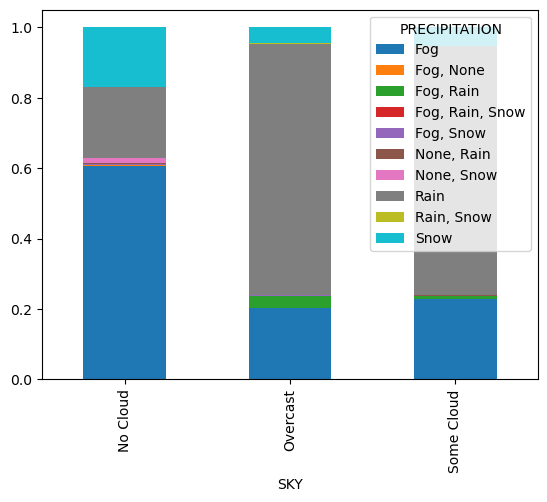

In [140]:
# 강수량이 존재하는 데이터 중에서 구름 양 별로 강수량 카테고리 비율
weather_filtered = weather.query('SKY.notnull() & PRECIPITATION.notnull()')
grouped = weather_filtered.groupby(['SKY', 'PRECIPITATION']).size().unstack(fill_value=0)
grouped.div(grouped.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

In [148]:
# # join안된것들 중에서 sky 정보가 없는 것들
no_ID = weather[(weather['USAF'].isna()) & (weather['SKY'].isna())]['AIRPORT_ID'].unique()
no_ID

array(['KDEN*', 'LA28', '3R9', '5B6', '1Q5', '41C', 'KJZP', 'U42', '6K5',
       'CYAG', 'KUMP', '5B2', '1V0', '79J', '07FA', 'KANQ', '35ME', 'S31',
       'N07', '4IA2', '4M1', 'MN56', '00OI', 'MI32', '42PN', '24LA',
       'KLCQ', 'KWAY', '26N', 'NY0', 'X51', 'KHSD', '99Y', '4V0', 'PAEE',
       'KUBX', '12N', '34VA', 'KAVQ', 'X59', 'NE41', 'KCVC', '6J0',
       'TN98', '7LS4', 'KDXE', 'KLSN', 'KSUZ', 'CO49', '3T3', '7G8',
       '2MU1', 'KPMH', 'I18', 'KBWC', '3MI2', '7A5', 'PPDM', 'W00', '1G3',
       'KCFO', '50R', '74TX', '52A', 'AK28', 'N66', 'C66', 'P10', 'KMQJ',
       '06FA', '1B2', '77MI', 'S78', 'KCOI', '2IS', 'FL59', 'KJVY', '1G0',
       'X04', 'K24', 'N30', '4D0', 'H88', '0TN8', 'O41', '7MI3', 'L45',
       '2G4', '7LS3', 'W29', 'KMBO', 'W48', 'TX17', '65NJ', 'KLNA',
       '9NC1', 'KMBT', '3DW', '6Y8', 'E70', '7W4', 'W24'], dtype=object)

In [152]:
pd.DataFrame(no_ID, columns=['weather.df'])

,weather.df
0,KDEN*
1,LA28
2,3R9
3,5B6
4,1Q5
...,...
97,3DW
98,6Y8
99,E70
100,7W4


In [102]:
# 미국, 캐나다
north_america = isd.query('CTRY == "US" or CTRY == "CA"')
north_america.head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
13192,621010,99999,MOORED BUOY,US,NaN,NaN,50.6,-2.933,-999.0,20080721,20080721
13194,621110,99999,MOORED BUOY,US,NaN,NaN,58.9,-0.200,-999.0,20041118,20041118
13195,621130,99999,MOORED BUOY,US,NaN,NaN,58.4,0.300,-999.0,20040726,20040726
13196,621160,99999,MOORED BUOY,US,NaN,NaN,58.1,1.800,-999.0,20040829,20040829
13197,621170,99999,MOORED BUOY,US,NaN,NaN,57.9,0.100,-999.0,20040726,20040726


In [103]:
weather = data[['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'TIME',
                'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE', 'STATE',
                'SKY', 'PRECIPITATION']]

In [110]:
weather['AIRPORT_ID'].unique()
isd['ICAO'].unique()

array([nan, 'ENRS', 'ENJA', ..., 'KY70', 'KDYA', 'KFWB'], dtype=object)

In [114]:
'KDEN' not in isd['ICAO'].unique()

False

In [ ]:
## weather의 AIRPORT_ID가 north_america의 ICAO 안에 있는가?
## 없는 AIRPORT_ID와 공항명은??
## 매칭되게 최대한 수정한 후 left join 하면 됨

airportID = set(weather['AIRPORT_ID'])
ICAO = set(isd['ICAO'])

[id for id in airportID if id not in ICAO]

633

In [97]:
data['SKY'].value_counts(dropna=False)

SKY
No Cloud      64290
Some Cloud    46051
NaN           42699
Overcast      23369
Name: count, dtype: int64

In [98]:
data['PRECIPITATION'].value_counts(dropna=False)

PRECIPITATION
NaN                165402
Rain                 7650
Fog                  2441
Snow                  533
Fog, Rain             318
Rain, Snow             28
Fog, Snow              17
None, Rain              8
Fog, Rain, Snow         6
None, Snow              5
Fog, None               1
Name: count, dtype: int64

In [ ]:
# time 이 null이 아닌 것 중 타겟 비율
time_na_target = data[~data['TIME'].isna()]['DAMAGE_LEVEL'].value_counts()
all_data_target = data['DAMAGE_LEVEL'].value_counts()

pd.DataFrame()

DAMAGE_LEVEL
N     142211
M       6059
M?      5728
S       2874
D         25
Name: count, dtype: int64

In [ ]:
# time 이 null인 아닌 것 중 타겟 비율
data[~data['TIME'].isna()]['DAMAGE_LEVEL'].value_counts()

##### 나머지

In [50]:
# is.na(AIRPORT_LATITUDE) & !(AIRPORT_ID %in% not_use_ID) 

data['AIRPORT_LATITUDE'].isna().sum()

0

In [80]:
print('##### ')
print(data['SKY'].value_counts(dropna=False))

##### 
SKY
NaN           124449
No Cloud       65014
Some Cloud     46775
Overcast       23734
Name: count, dtype: int64


<Axes: >

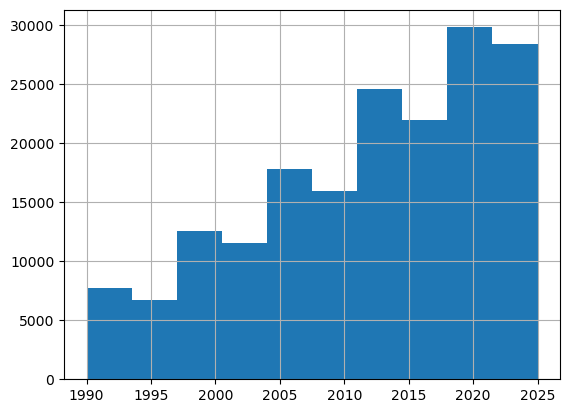

In [52]:
data['INCIDENT_YEAR'].hist()

### Y 관련

In [18]:
data['INDICATED_DAMAGE'].value_counts(dropna=False)

INDICATED_DAMAGE
0    162346
1     14688
Name: count, dtype: int64

In [17]:
data['DAMAGE_LEVEL'].value_counts(dropna=False)

DAMAGE_LEVEL
N      142211
NaN     20137
M        6059
M?       5728
S        2874
D          25
Name: count, dtype: int64

In [ ]:
## DAM 계열 합계
damage_cols = data.filter(like='DAM_').columns
data['DAMAGE_sum'] = data[damage_cols].sum(axis=1)

0         0
1         0
2         0
3         0
4         1
         ..
176404    0
176405    0
176406    0
176407    0
176408    0
Name: DAMAGE_sum, Length: 176409, dtype: int64

In [250]:
data.groupby(['DAMAGE_sum', 'DAMAGE_LEVEL']).size().unstack(fill_value=0)

DAMAGE_LEVEL,D,M,M?,N,S
DAMAGE_sum,,,,,
0,0,0,0,141827,0
1,2,5427,5006,1,2249
2,3,504,537,0,372
3,2,77,105,0,145
4,3,9,26,0,51
5,0,1,5,0,21
6,2,1,3,0,14
7,2,0,0,0,3
8,0,0,0,0,3


<Axes: xlabel='DAMAGE_sum'>

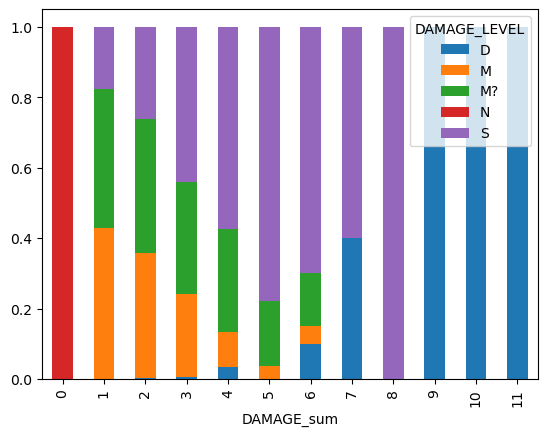

In [262]:
damage_grouped = data.groupby(['DAMAGE_sum', 'DAMAGE_LEVEL']).size().unstack(fill_value=0)
damage_grouped.div(damage_grouped.sum(axis=1), axis=0).plot(kind='bar', stacked=True)

In [249]:
for text in data[(data['DAMAGE_sum'] == 1) & (data['DAMAGE_LEVEL']=='D')]['REMARKS']:
    print(text)

Final NTSB report (ERA19FA170) indicates bird remains were found inside and outside wreckage. Assume bird strike but this may be revised pending issue of final report. 4.9 nautical miles from APF. From NTSB preliminary report: The airplane came to rest in a residential area about 5 miles northeast of APF. It was fragmented as a result of tree and ground impacts immediately adjacent to a house. Feathers and a dead bird were found in separate areas among the wreckage. Parts associated with the airplane including two small window pieces, the headrest from a rear seat, and three inflatable life vests were found several hundred feet from the main wreckage. The feathers, bird, and specimen samples from some of the outlying airplane debris, as well as from several areas of the airplane interior were retained for testing at The Feather Identification Lab, Smithsonian Institution, Washington, DC. owner/operator =  COLLIER AVIATION LLCUPDATE: FINAL NTSB REPORT:  While on approach to the destinat

<Axes: xlabel='DAMAGE_LEVEL', ylabel='COST_REPAIRS'>

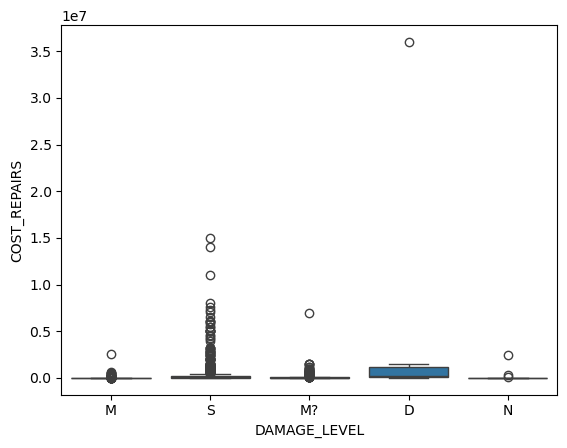

In [273]:
import seaborn as sns

sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=data[~data['COST_REPAIRS'].isna()])

In [283]:
data[data['DAMAGE_LEVEL'].isna()]['DAMAGE_sum'].value_counts()
# 모두 데미지 0이고 1개만 1

DAMAGE_sum
0    20001
1        1
Name: count, dtype: int64

In [ ]:
# pd.set_option('display.max_colwidth', None)
data[(data['DAMAGE_LEVEL'].isna()) & (data['DAMAGE_sum'] == 1)][["EFFECT", "EFFECT_OTHER", "AOS",
                "COST_REPAIRS","COST_OTHER","COST_REPAIRS_INFL_ADJ","COST_OTHER_INFL_ADJ",
                "NR_INJURIES","NR_FATALITIES"]]
# => N으로 해도 될 것 같음.

,EFFECT,EFFECT_OTHER,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES
171100,Precautionary Landing,NaN,28.0,600.0,500.0,600.0,500.0,NaN,NaN


In [40]:
data['DAM_OTHER'].value_counts()

DAM_OTHER
0    175457
1      1577
Name: count, dtype: int64

In [ ]:
### DAMAGE_LEVEL 결측치는 모두 N으로 채우면 될 것 같음.

In [ ]:
## response 관련 변수들

# parts = ['RAD', 'WINDSHLD', 'NOSE', 'ENG1', 'ENG2', 'ENG3', 'ENG4', 'PROP', 'WING_ROT', 'FUSE', 'LG', 'TAIL', 'LGHTS', 'OTHER']
# types = ['STR', 'DAM']
# from itertools import product
# [f"{t}_{p}" for p, t in product(parts, types)]

response_var = ['DAMAGE_LEVEL',
 'STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'STR_ENG1',
 'DAM_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'ING_ENG2',
 'STR_ENG3',
 'DAM_ENG3',
 'ING_ENG3',
 'STR_ENG4',
 'DAM_ENG4',
 'ING_ENG4',
 'INGESTED_OTHER',
 'STR_PROP',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'STR_LG',
 'DAM_LG',
 'STR_TAIL',
 'DAM_TAIL',
 'STR_LGHTS',
 'DAM_LGHTS',
 'STR_OTHER',
 'DAM_OTHER',
 'OTHER_SPECIFY',
 'NR_INJURIES',
 'NR_FATALITIES',
 'INDICATED_DAMAGE']

In [13]:
data['EFFECT'].value_counts(dropna=False)

EFFECT
NaN                                              165649
Precautionary Landing                              6566
Aborted Take-off                                   2748
Other                                              1268
Other, Precautionary Landing                        336
Engine Shutdown, Precautionary Landing              201
Engine Shutdown                                     181
Engine Shutdown, Other, Precautionary Landing        36
Aborted Take-off, Engine Shutdown                    30
Aborted Take-off, Other                              10
Engine Shutdown, Other                                9
Name: count, dtype: int64